In [29]:
import pandas as pd
import json

fname = pd.read_parquet('../models/ga_models_2/kos_25_73_75.parquet')


In [30]:
fname

,biomass_reaction,confidence,in_model,is_cs_ko,inactivate_reactions
gene_id,,,,,
wild_type,0.084443,NaN,None,None,NaN
AOC1,0.084443,3.0,True,False,9.0
CYP24A1,0.084443,1.0,True,False,1.0
CYP27B1,0.084443,1.0,True,False,2.0
SULT1A3,0.084443,1.0,True,False,6.0
...,...,...,...,...,...
UPP2,0.084443,-1.0,True,False,0.0
WWOX,0.084443,3.0,True,False,0.0
XYLT1,0.084443,-1.0,True,False,0.0


In [2]:
import pandas as pd
expression_ceres_df = pd.read_parquet('../data/processed/expression_ceres_df.parquet')
expression_stats_df = pd.read_parquet('../data/processed/expression_stats_df.parquet')
ceres_stats_df = pd.read_parquet('../data/processed/ceres_stats_df.parquet')

In [4]:
expression_ceres_df

,expression,ceres
A4GALT,0.150560,-0.073618
A4GNT,0.042644,0.119098
AACS,4.690417,0.131970
AADAC,0.000000,0.148652
AADAT,3.570463,0.088240
...,...,...
XDH,0.189034,0.132189
XYLB,2.446256,0.067276
XYLT1,0.014355,0.021712
XYLT2,2.541019,-0.151942


In [32]:
fname_essentials = fname[fname['biomass_reaction']< 0.0844*0.1][fname['in_model'] == True]
insilico_lethals = fname_essentials.index
insilico_non_lethals = fname.drop(fname_essentials.index).index

<ipython-input-32-14f49191d591>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fname_essentials = fname[fname['biomass_reaction']< 0.0844*0.1][fname['in_model'] == True]


In [33]:
lethal_ceres_df = ceres_stats_df.loc[ceres_stats_df.index.intersection(insilico_lethals)]
non_lethal_ceres_df = ceres_stats_df.loc[ceres_stats_df.index.intersection(insilico_non_lethals)]

C:\Miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Miniconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Miniconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` 

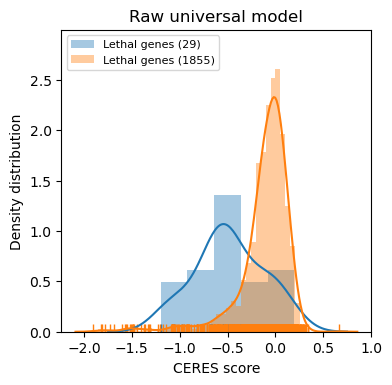

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
fig, ax = plt.subplots(1, 1, figsize=(4,4), dpi=100)
lab_eg = f'Lethal genes ({len(insilico_lethals)})'
lab_noneg = f'Lethal genes ({len(insilico_non_lethals)})'
sns.distplot(lethal_ceres_df['mean_ceres'], ax=ax, rug=True, kde=True, label=lab_eg)
sns.distplot(non_lethal_ceres_df['mean_ceres'], ax=ax, rug=True, kde=True, label=lab_noneg)

ax.set_xlabel("CERES score")
ax.set_ylabel("Density distribution")
ax.set_title("Raw universal model")
ax.legend(loc='upper left', prop={'size': 8})

In [35]:
import scipy.stats
res = scipy.stats.mannwhitneyu(lethal_ceres_df['mean_ceres'],non_lethal_ceres_df['mean_ceres'])
statistic = res.statistic
pval = res.pvalue
print(res)

MannwhitneyuResult(statistic=9887.0, pvalue=8.578400277188239e-09)
